<a href="https://colab.research.google.com/github/bridgetmanu/Biodiversity/blob/main/source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read file and familiarize with the content

In [8]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data1 = pd.read_csv("/content/observations.csv")
data2 = pd.read_csv("/content/species_info.csv")

# clean data
# remove NA values
data1 = data1.dropna()
data2 = data2.dropna()

# view dataframe
pd.DataFrame(data1)
pd.DataFrame(data2)


sql = sqlite3.connect("species_info.db")
data2.to_sql("species_info", sql, if_exists = "replace")
con = sql.cursor()

#Use sql to query the DataFrame

def sqlquery(status):
    obs1 = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs2 = pd.DataFrame(obs1)
    return obs2
# about 10 of the species in the dataframe are threatened
# about 16 of the species in the dataframe are Endangered

status = input("Enter a conservation status: ")
sqlquery(status)




Enter a conservation status: Endangered


,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


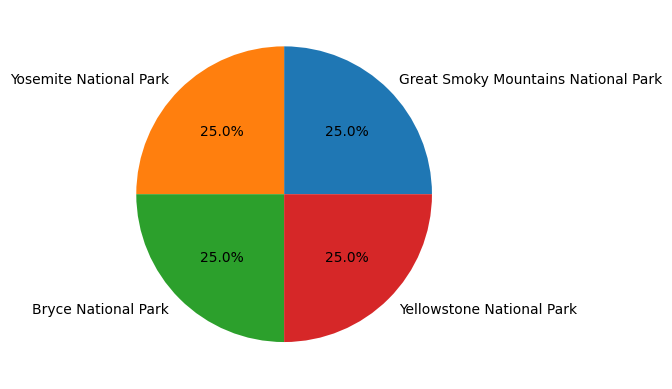

In [ ]:
import matplotlib.pyplot as plt

# Pie Chart of Conservation Status in the parks

plt.pie(data2['conservation_status'].value_counts(), labels=data2['conservation_status'].unique(), autopct='%1.1f%%')
plt.show()

plt.pie(data1['park_name'].value_counts(), labels=data1['park_name'].unique(), autopct='%1.1f%%')
plt.show()

# Bar chart of Park names ()

plt.bar(data1['park_name'].unique(), height=data1['park_name'].value_counts())
plt.show()


About 84.3% of animals in the park are species of concern;
About 8.4% of the animals are endangered; 5.2% are threatened and 2.1% are in recovery.

There are equal amount of observations from each park


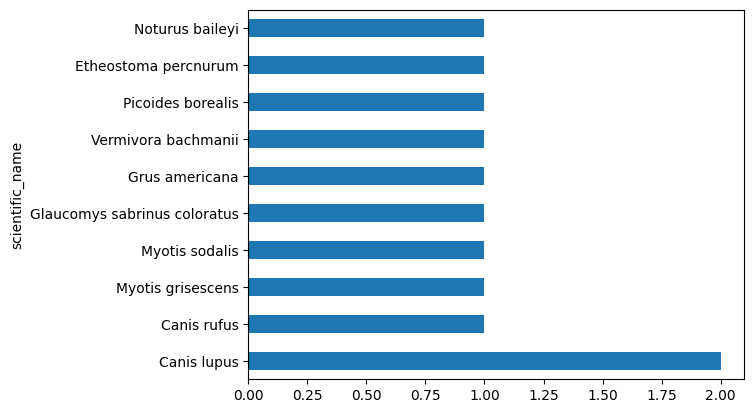

,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


In [15]:
def sqlquery(status):
    obs = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['scientific_name'].value_counts().nlargest(10)
    top_5.plot(kind='barh')
    plt.show()
    return obs3

sqlquery(status="Endangered")



Cannis Lupus (Grey Wolf) are more likely to be endangered

•	Are certain types of species more likely to be endangered?

•	Are the differences between species and their conservation status significant?

•	Which species were spotted the most at each park?
